In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler 
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from sklearn.model_selection import KFold
import warnings

In [2]:
df = pd.read_csv("d:\Intership\Ineuron\south_german_credit.csv")

In [48]:
df.head()

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


In [57]:
scaler = StandardScaler()  # Feature scaling
X_scaled = scaler.fit_transform(df.drop('kredit', axis=1))
X_train, X_test, y_train, y_test = train_test_split(X_scaled, df['kredit'], test_size=0.2, random_state=42)


In [58]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.2))  # Regularization
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Optimizer with adjusted learning rate
optimizer = Adam(learning_rate=0.0001)  # Consider lower learning rate

model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/50
20/20 [==============================] - 2s 22ms/step - loss: 0.6011 - accuracy: 0.6797 - val_loss: 0.5664 - val_accuracy: 0.7250
Epoch 2/50
20/20 [==============================] - 0s 6ms/step - loss: 0.5950 - accuracy: 0.6906 - val_loss: 0.5622 - val_accuracy: 0.7250
Epoch 3/50
20/20 [==============================] - 0s 6ms/step - loss: 0.5915 - accuracy: 0.7000 - val_loss: 0.5590 - val_accuracy: 0.7312
Epoch 4/50
20/20 [==============================] - 0s 7ms/step - loss: 0.5857 - accuracy: 0.6984 - val_loss: 0.5556 - val_accuracy: 0.7375
Epoch 5/50
20/20 [==============================] - 0s 6ms/step - loss: 0.5802 - accuracy: 0.6922 - val_loss: 0.5528 - val_accuracy: 0.7375
Epoch 6/50
20/20 [==============================] - 0s 7ms/step - loss: 0.5754 - accuracy: 0.7047 - val_loss: 0.5501 - val_accuracy: 0.7375
Epoch 7/50
20/20 [==============================] - 0s 7ms/step - loss: 0.5707 - accuracy: 0.7016 - val_loss: 0.5472 - val_accuracy: 0.7375
Epoch 8/50
20/20 [=

In [59]:
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", accuracy*100)

7/7 [==============================] - 0s 3ms/step
Accuracy: 78.0


In [60]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 64)                1344      
                                                                 
 dropout_12 (Dropout)        (None, 64)                0         
                                                                 
 dense_19 (Dense)            (None, 32)                2080      
                                                                 
 dropout_13 (Dropout)        (None, 32)                0         
                                                                 
 dense_20 (Dense)            (None, 1)                 33        
                                                                 
Total params: 3457 (13.50 KB)
Trainable params: 3457 (13.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [63]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_binary)

# Extract TP, FP, FN, TN from the confusion matrix
TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]

# Print the results
print("True Positives (TP):", TP)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)
print("True Negatives (TN):", TN)

True Positives (TP): 30
False Positives (FP): 32
False Negatives (FN): 12
True Negatives (TN): 126


In [64]:
from sklearn.metrics import classification_report

# Assuming you have y_pred and y_test from your code

print(classification_report(y_test, y_pred_binary))

              precision    recall  f1-score   support

           0       0.71      0.48      0.58        62
           1       0.80      0.91      0.85       138

    accuracy                           0.78       200
   macro avg       0.76      0.70      0.71       200
weighted avg       0.77      0.78      0.77       200



7/7 [==============================] - 0s 3ms/step


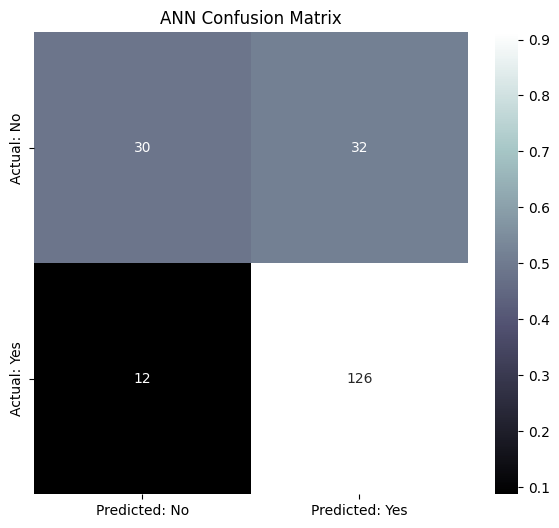

In [71]:
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)

# Plot the confusion matrix using your defined function
plot_confusion_matrix(cm, normalized=True)  # Set normalized to True for percentages
plt.title('ANN Confusion Matrix')
plt.show()